Create combined loss and mAP graphs for train and test.

In [7]:
import pickle
import matplotlib.pyplot as plt
from torchmetrics.detection.mean_ap import MeanAveragePrecision
import torch

num_epochs = 30

In [8]:
models = ["yolov5x.pt","yolov5m.pt","yolov5n.pt"] #Something wrong with yolov5n, recompute for that
metrics = []

for model in models:
    metrics.append(torch.load(f"metrics/metrics_{model}"))
for metric in metrics:
    metric["train_mAP"] = [elem["map"].item() for elem in metric["train_mAP"]]
    metric["test_mAP"] = [elem["map"].item() for elem in metric["test_mAP"]]
print(metrics[0])

{'train_mAP': [0.006030199117958546, 0.22603295743465424, 0.41781702637672424, 0.4872906506061554, 0.5243809223175049, 0.5353921055793762, 0.5652212500572205, 0.5772625803947449, 0.6287000179290771, 0.6302971243858337, 0.6521002054214478, 0.682857871055603, 0.6796419024467468, 0.7040392160415649, 0.7119469046592712, 0.722379744052887, 0.7362067103385925, 0.743839681148529, 0.7516770362854004, 0.7703903913497925, 0.7595534920692444, 0.7694219946861267, 0.7854154109954834, 0.7995359897613525, 0.8171602487564087, 0.8094026446342468, 0.8051661252975464, 0.8119628429412842, 0.8227569460868835, 0.8286300897598267], 'test_mAP': [0.24493487179279327, 0.4146905839443207, 0.3912922441959381, 0.4074675142765045, 0.43362054228782654, 0.47917646169662476, 0.449042409658432, 0.4340418875217438, 0.45690441131591797, 0.47489961981773376, 0.45630913972854614, 0.46520084142684937, 0.48854997754096985, 0.47655096650123596, 0.4824617803096771, 0.48045191168785095, 0.4808364510536194, 0.48675230145454407, 

30
30
30


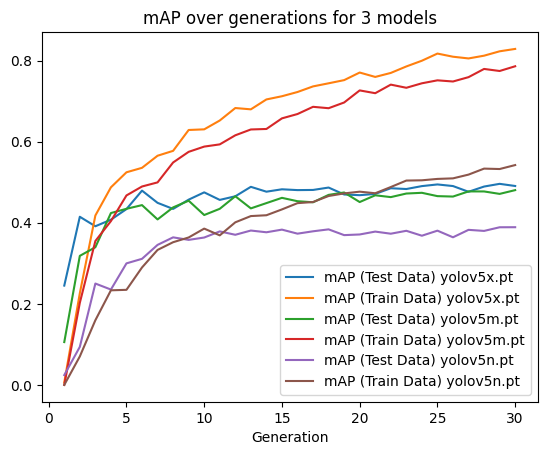

In [11]:
%matplotlib inline
gen = [i for i in range(1,num_epochs+1)]
for metric, model in zip(metrics,models):
    print(len(metric["test_mAP"]))
    plt.plot(gen,metric["test_mAP"],label=f"mAP (Test Data) {model}")
    plt.plot(gen,metric["train_mAP"],label=f"mAP (Train Data) {model}")


plt.title(f"mAP over generations for 3 models")
plt.xlabel("Generation")
plt.legend()
plt.savefig("images/combined_mAP.png")
plt.show()

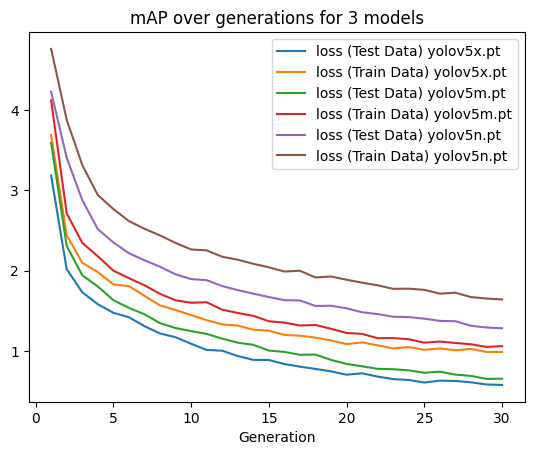

In [13]:
%matplotlib inline
gen = [i for i in range(1,num_epochs+1)]
for metric, model in zip(metrics,models):
    plt.plot(gen,metric["losses"],label=f"loss (Train Data) {model}")
    plt.plot(gen,metric["test_losses"],label=f"loss (Test Data) {model}")


plt.title(f"Loss over generations for 3 models")
plt.xlabel("Generation")
plt.legend()
plt.savefig("images/combined_loss.png")
plt.show()